# Cost Complexity Pruning 

tree score = sum of least squared residual + alpha*terminal 


In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np

In [4]:
iris=load_iris()
x=iris.data[:,2:]
y=iris.target

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
clf_tree=DecisionTreeClassifier(random_state=0)

In [8]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

Applying the cost complexity pruning to prune decision tree 

In [9]:
path=clf_tree.cost_complexity_pruning_path(x_train,y_train)
alphas=path.ccp_alphas

In [10]:
print('Alpha values ',alphas)

Alpha values  [0.         0.00792683 0.01       0.01619048 0.02380952 0.25871926
 0.32988169]


these are the different values of alpha for the decisiion tree to prune it by removing the leaf to get the lowest sum of least squared residual

In [17]:
tree=[]
cv_score=[]
for alpha in alphas:
    tree_clf=DecisionTreeClassifier(random_state=0)
    cross=cross_val_score(tree_clf,x_train,y_train,cv=10)
    tree_clf.fit(x_train,y_train)
    tree.append(tree_clf)
    cv_score.append(np.mean(cross))

In [21]:
best_index = np.argmax(cv_score)
best_alpha = alphas[best_index]
best_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
best_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0)

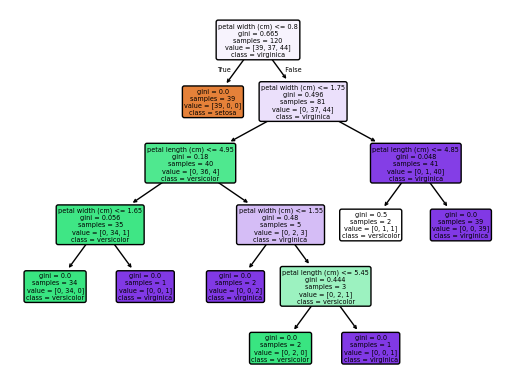

In [24]:
plot_tree(best_tree,feature_names=iris.feature_names[2:],class_names=iris.target_names,rounded=True,filled=True)
plt.show()

In [27]:
print('Set of alphas\n',alphas)
print('Cross validation score \n',cv_score)
print('Best value for alphas\n',best_alpha)

Set of alphas
 [0.         0.00792683 0.01       0.01619048 0.02380952 0.25871926
 0.32988169]
Cross validation score 
 [np.float64(0.9416666666666667), np.float64(0.9416666666666667), np.float64(0.9416666666666667), np.float64(0.9416666666666667), np.float64(0.9416666666666667), np.float64(0.9416666666666667), np.float64(0.9416666666666667)]
Best value for alphas
 0.0


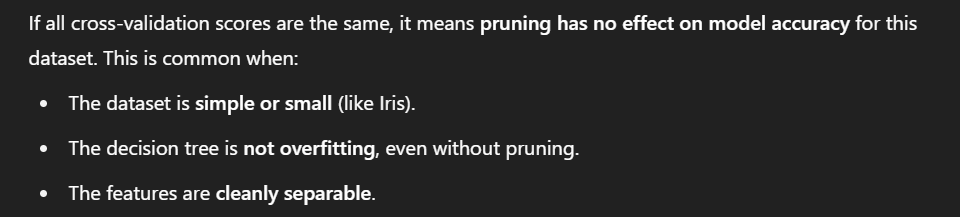